<a href="https://colab.research.google.com/github/DmitriiDenisov/research-DT-Logreg/blob/master/Optimize_custom_loss_RT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.optimize import fmin_slsqp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

Optimization of function wrt vector.
Example of how it should work
Source: https://stackoverflow.com/questions/41145643/find-optimal-vector-that-minimizes-function

In [2]:
def w_rss1(w, x0, x1):
    predictions = np.dot(x0, w)
    errors = x1 - predictions
    rss = (errors**2).sum()
    return rss

X0 = np.array([[3,4,5,3],
               [1,2,2,4],
               [6,5,3,7],
               [1,0,5,2]])  

X1 = np.array([4, 2, 4, 2]) 

# You can change start point, anyway it will converge to [-0.01036277  0.48704642  0.37305673  0.07253886]
W = np.array([23, -1, 12, -132.32])

result = fmin_slsqp(w_rss1, W, bounds=[(-100, 100)]*len(W), args=(X0, X1), disp=False, full_output=True)
Wopt, fW, its, imode, smode = result

if imode != 0:
    print("Optimization failed: " + smode)
else:
    print(Wopt)

[-0.01036295  0.48704645  0.37305658  0.0725389 ]


Now how it works for our case:

In [3]:
def func(w, x, y):
  return np.mean(1 / (1 + np.exp(2.5 * y * np.dot(x, w))))

In [18]:
W = np.array([1, 1])
x = np.random.randn(10,2)
# standardise data
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

y = np.array([-1,-1,-1,-1,-1,1,1,1,1,1])


result = fmin_slsqp(func, W, bounds=[(-1000, 1000)]*len(W), args=(x, y), disp=False, full_output=True)
Wopt, fW, its, imode, smode = result

if imode != 0:
    print("Optimization failed: " + smode)
else:
    print(Wopt)

[-12.62112164  14.90294619]


Now not for random dataset: 

In [49]:
x = np.array([[ 1 , 0],
       [ 0. ,  0.4],
       [ 5.        ,  5.        ],
       [ 1.        ,  1.        ]])

# Standartise data
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

x = np.c_[ x, np.ones(x.shape[0]) ] # add column of ones for bias
y = np.array(2*[-1]+2*[1])
W = np.array([1.123, -2.7, 3.1])

result = fmin_slsqp(func, W, bounds=[(-1000, 1000)]*len(W), args=(x, y), disp=False, full_output=True)
Wopt, fW, its, imode, smode = result

if imode != 0:
    print("Optimization failed: " + smode)
else:
    print(Wopt)

[23.43703059 20.47363671 20.58103203]


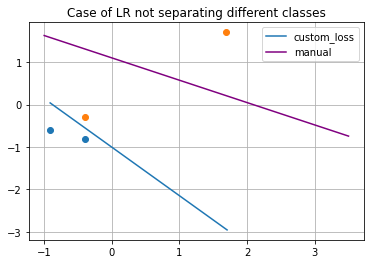

In [50]:
b = Wopt[2]
m0 = Wopt[0]
m1 = Wopt[1]

#Plot
x_vals = np.linspace(x.min(),x.max(),100)
y_vals = -(m0/m1)*x_vals - b/m1

plt.scatter(x[y==-1][:,0], x[y==-1][:,1])
plt.scatter(x[y==1][:,0], x[y==1][:,1])
plt.plot(x_vals, y_vals, label = 'custom_loss')
m1 = -0.527
b1 = 1.1
t = np.linspace(-1, 3.5, 50)
plt.plot(t, m1*t+b1, color='purple', label='manual')

plt.title('Case of LR not separating different classes')
plt.grid(True)
plt.legend()
plt.show()